<a href="https://colab.research.google.com/github/littleffar/py_stat/blob/main/correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### VIDEO 1: Correlation coefficient

####Covariance, Correlation, R-Squared formular

\begin{array}{l}
cov=\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right) \\ \\
corr=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2} \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}
\end{array}

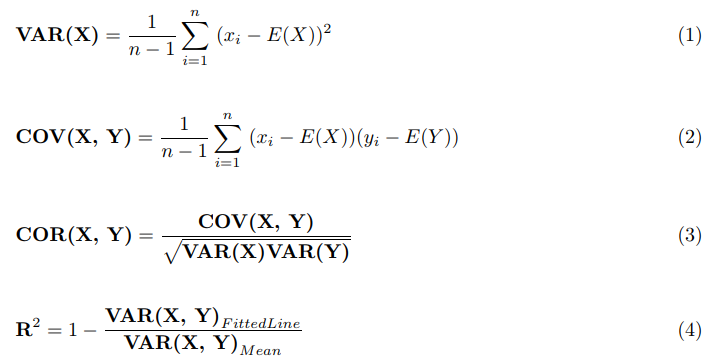

#### Covariance vs correlation

`Covariance` is a single number that measures the **linear relationship** between two variance.

`correlation` **is the scaled covariance.**
is normalized to be independednt of the data scale

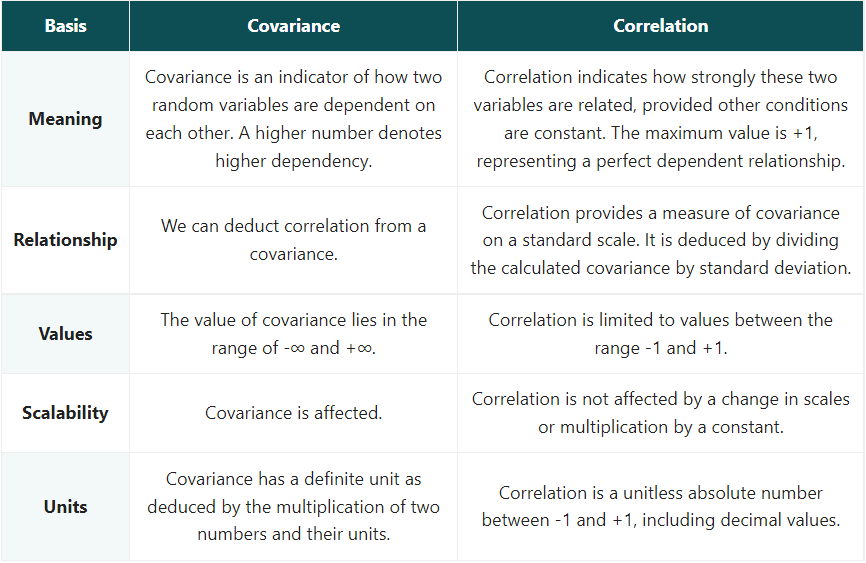

to understand more on covariance matrix:
[Covariance Matrix, Variance, Covariance](https://www.sharetechnote.com/html/Handbook_EngMath_CovarianceMatrix.html)

#### P-value of corr
1. find the t-value

\begin{align}
t_{n-2} & = \frac{corr  * \sqrt{n-2}}{1-r^{2}}
\end{align}

statistical significance is computed from a t-value
this t value is based on the strenth of the correlation and the number of data points.

notice the t value is more sinsitive to corr

#### code

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

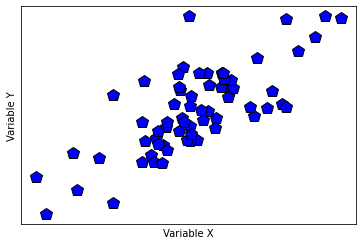

In [2]:
## simulate data

N = 66

# generate correlated data
x = np.random.randn(N)
y = x + np.random.randn(N)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
## compute covariance

# precompute the means
meanX = np.mean(x)
meanY = np.mean(y)

### the loop method
covar1 = 0
for i in range(N):
    covar1 = covar1 + (x[i]-meanX)*(y[i]-meanY)


### the linear algebra method
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N-1)


### the Python method
covar3 = np.cov(np.vstack((x,y)))

print(covar1,covar2,covar3)

81.8854168460713 1.2597756437857126 [[1.22006878 1.25977564]
 [1.25977564 2.29306   ]]


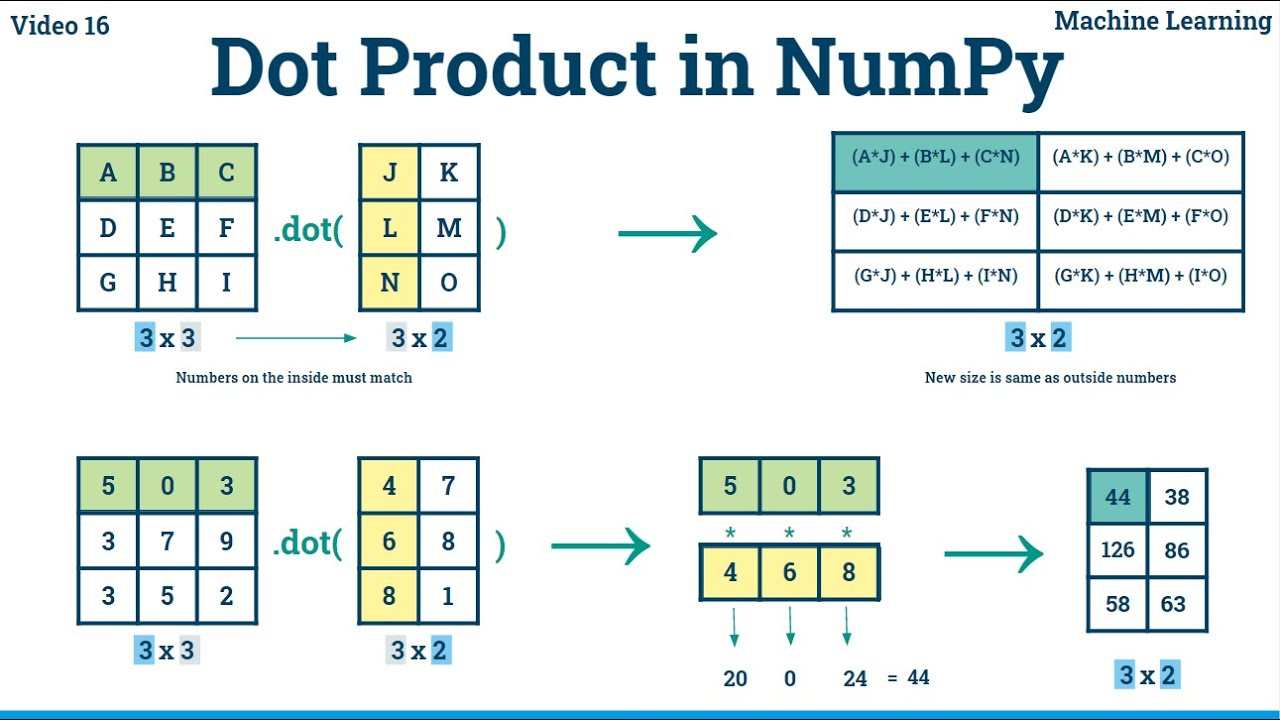

In [5]:
## Now for correlation

### the formular method
corr_num = sum((x-meanX) * (y-meanY) )
corr_den = sum( (x-meanX)**2) * sum((y-meanY)**2 ) 
corr1 = corr_num/np.sqrt(corr_den)

### the python method
corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1)
print(corr2)

0.7531705681818425
[[1.         0.75317057]
 [0.75317057 1.        ]]


#### ！！！correlation as normalized covariance
if th3 variables x , y are normalized, such that they have a mean of zero and a variance of one.

**Then the correlation coefficient is exactly equal to the covariance.**

In [7]:
## correlation as normalized covariance

xn = stats.zscore(x,ddof=1)  #回顾：z值只是把数据标准化到 N (0，1) 时的值
yn = stats.zscore(y,ddof=1)

corr3 = np.dot(xn,yn) / (N-1)

print(corr1)
print(corr3)

0.7531705681818425
0.7531705681818429


<ipython-input-9-9147b5eca241>:18: RuntimeWarning: divide by zero encountered in double_scalars
  tmatrix[ri,ni] = num/den
<ipython-input-9-9147b5eca241>:19: RuntimeWarning: divide by zero encountered in double_scalars
  pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)


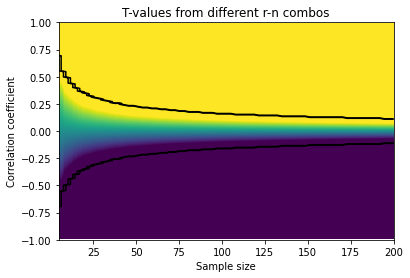

In [9]:
## 2D t-value space based on r and n

# define parameters
r = np.linspace(-1,1,248)
n = np.round( np.linspace(5,200,73) )

# initialize t-value matrix
tmatrix = np.zeros((len(r),len(n)))
pmatrix = np.zeros((len(r),len(n)))

for ri in range(len(r)):
    for ni in range(len(n)):
        
        # the t-value, split into num/den
        num = r[ri]*np.sqrt(n[ni]-2)
        den = 1-r[ri]**2
        tmatrix[ri,ni] = num/den
        pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)

        
        
# Soooo curious to see it!
plt.imshow(tmatrix,vmin=-1,vmax=1,extent=[n[0],n[-1],r[0],r[-1]],aspect='auto',origin='lower')
plt.contour(pmatrix<.05,1,colors='k',extent=[n[0],n[-1],r[0],r[-1]])
plt.xlabel('Sample size')
plt.ylabel('Correlation coefficient')
plt.title('T-values from different r-n combos')
plt.show()

# question: Why the warning message?
# because the r is 1 in this case. this cause the denominator of t-value formular to 0

#### Code: Simulate data with specified correlation

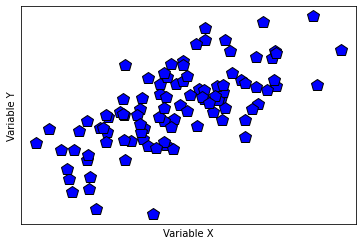

In [13]:
## simulate data

# data simulation parameters
N = 100  # number of samples
r = .6   # desired correlation coefficient

# start with random numbers
x = np.random.randn(N)
y = np.random.randn(N)

######################################
##### impose the correlation on y#####
######################################
y = x*r + y*np.sqrt(1-r**2)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
## compute the empirical correlation

empR = np.corrcoef(x,y)

print('Desired r=%g, empirical r=%g'%(r,empR[0,1]))

Desired r=0.6, empirical r=0.681885


<ipython-input-15-30f241f9909c>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(Ns,corrs,'ko-')


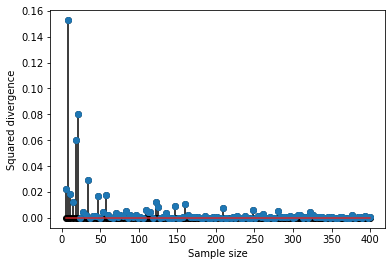

In [15]:
# Test the errors as a function of N

# range of sample sizes
Ns = np.round( np.linspace(5,400,123) ).astype(int)

# theoretical correlation coefficient (fixed)
r = .6

# initialize
corrs = np.zeros(len(Ns))

# run the experiment!
for ni in range(len(Ns)):
    x = np.random.randn(Ns[ni])
    y = x*r + np.random.randn(Ns[ni])*np.sqrt(1-r**2)
    corrs[ni] = (r-np.corrcoef(x,y)[0,1])**2
    

plt.stem(Ns,corrs,'ko-')
plt.xlabel('Sample size')
plt.ylabel('Squared divergence')
plt.show()

### VIDEO: Correlation matrix

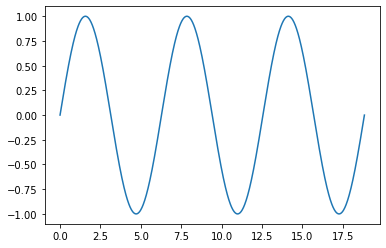

In [29]:
## simulate data

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
channel = np.sin(t)

plt.plot(t,channel)

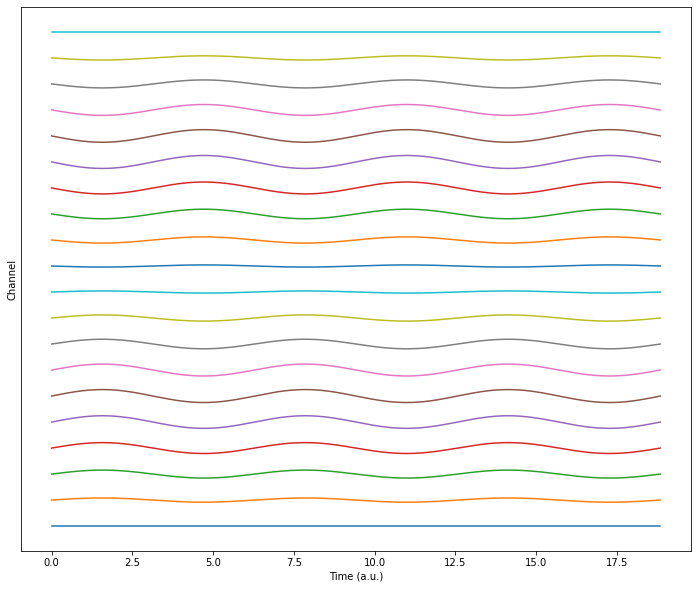

In [54]:
## simulate data

# simulation parameters
N = 1000  # time points
M =   20  # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi,:] = np.sin(t) * chanrel[mi]

# first method : time series
plt.figure(figsize=([12, 10]))
for i in range(M):
    plt.plot(t,data[i,:]+i*4) # here add a i*4 is for seperate channel which would overlap otherwise.
    
plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()    


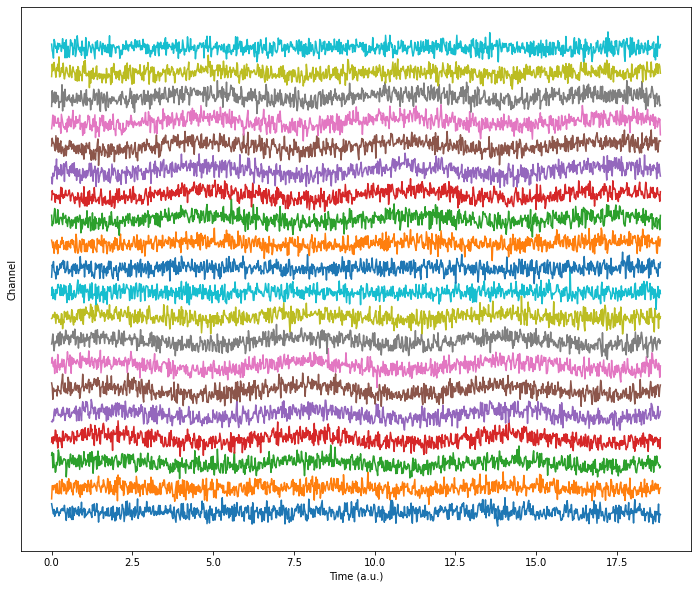

In [55]:
# two ways of visualizing the multichannel data
# first method : time series
data = data + np.random.randn(M,N) #add ranomness into pure sin wave 
plt.figure(figsize=([12, 10]))
for i in range(M):
    plt.plot(t,data[i,:]+i*5) # here add a i*5 is for seperate channel which would overlap otherwise.
    
plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

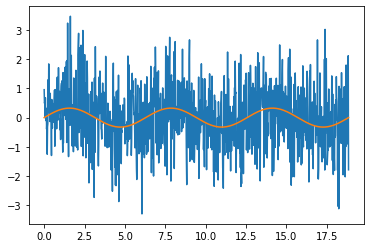

In [34]:
# a poke of single channel code:
plt.plot(t,np.sin(t) * chanrel[1]+np.random.randn(N))
plt.plot(t,np.sin(t) * chanrel[1])

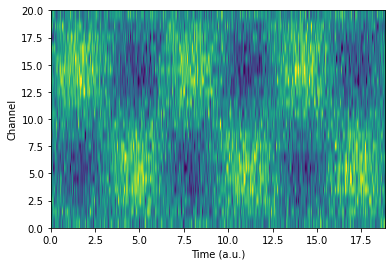

In [5]:
# second method : heat map
plt.imshow(data,aspect='auto',vmin=-2,vmax=2,extent=[t[0],t[-1],0,M])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

Text(0, 0.5, '??')

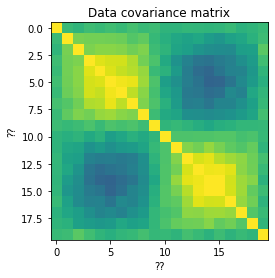

In [38]:
## now compute the covariance matrix

# note the size of the output!
dataCovMat = np.cov(data)

plt.imshow(dataCovMat,vmin=-1,vmax=.5)
plt.title('Data covariance matrix')
plt.xlabel('??')
plt.ylabel('??')


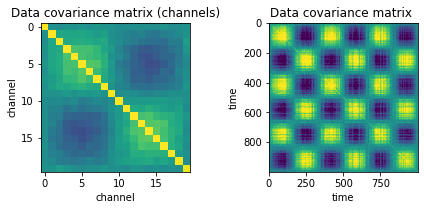

In [44]:
## now compute the covariance matrix

# note the size of the output!
dataCovMat = np.cov(data)
fig, ax = plt.subplots(1,2)
ax[0].imshow(dataCovMat,vmin=-1,vmax=1)
ax[0].set_title('Data covariance matrix (channels)')
ax[0].set_xlabel('channel')
ax[0].set_ylabel('channel')

dataCovMat = np.cov(data.T)
ax[1].imshow(dataCovMat,vmin=-.5,vmax=.5)
ax[1].set_title('Data covariance matrix ')
ax[1].set_xlabel('time')
ax[1].set_ylabel('time')
plt.tight_layout()
plt.show()


#### "Unsupervised learning": average correlation matrices

##### solution 1:

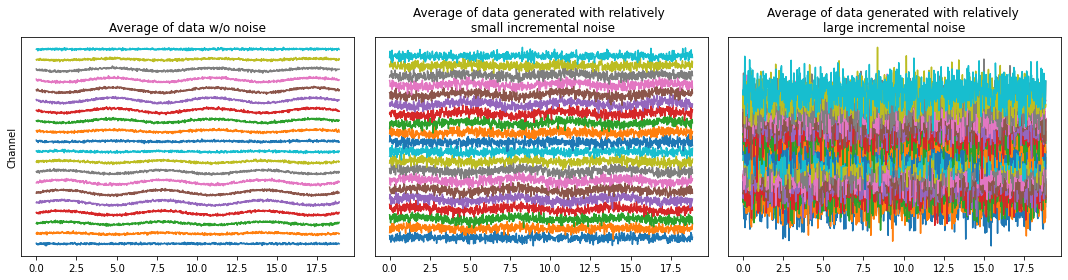

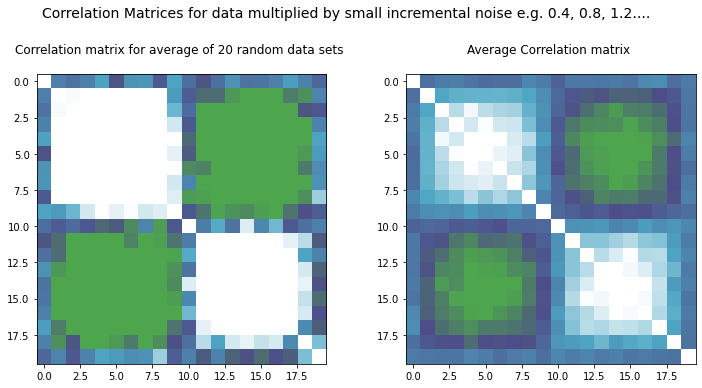

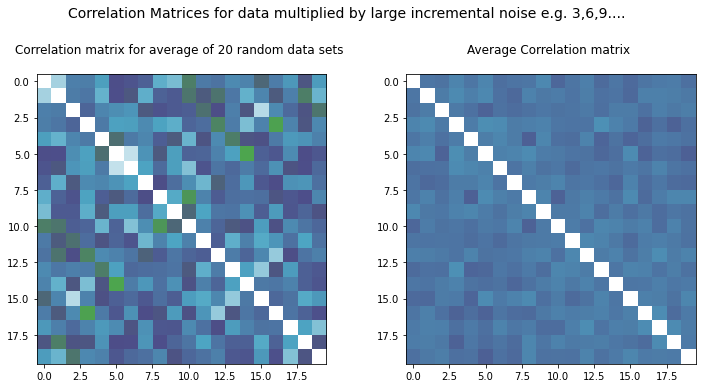

In [63]:
# simulation parameters
N = 1000  # time points
M =   20  # channels
 
# time vector (radian units)
t = np.linspace(0,6*np.pi,N)
 
# relationship across channels (imposing covariance)
channel = np.sin(np.linspace(0,2*np.pi,M)) 
 
# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi:] = np.sin(t) * channel[mi]
 
wo_noise = []
small_noise = []
large_noise = []
avgcorr_small_noise = []
avgcorr_large_noise = []
 
for noise in range(1,21):
    
    data1 = data + np.random.randn(M,N)
    data2 = data + np.random.randn(M,N) * noise * 0.4
    data3 = data + np.random.randn(M,N) * noise * 3 
    
    wo_noise.append(data1)
    small_noise.append(data2)
    large_noise.append(data3)
    
    avgcorr_small_noise.append(np.corrcoef(data2))
    avgcorr_large_noise.append(np.corrcoef(data3))
    
# # calculate correlation for average of data
 
dataCorrMat_s = np.corrcoef(np.mean(small_noise,axis=0))
dataCorrMat_l = np.corrcoef(np.mean(large_noise,axis=0))
 
# # calculate average of correlations
averg_corr_s = np.mean(avgcorr_small_noise,axis=0)
averg_corr_l = np.mean(avgcorr_large_noise,axis=0)
 
 
# plot data to check impact of noise on averages
fig, a = plt.subplots(1,3,figsize=(15,4))
 
for i in range(M):
    a[0].plot(t,np.mean(wo_noise,axis=0)[i,:]+i*4)
 
for j in range(M):
    a[1].plot(t,np.mean(small_noise,axis=0)[j,:]+j*4)
 
for k in range(M):
    a[2].plot(t,np.mean(large_noise,axis=0)[k,:]+k*4)
    
    
a[0].set_yticks([])
a[0].set_ylabel(ylabel='Channel')
a[0].set_title("Average of data w/o noise")
 
a[1].set_yticks([])
a[1].set_title("Average of data generated with relatively \n small incremental noise")
 
 
a[2].set_yticks([])
a[2].set_title("Average of data generated with relatively \nlarge incremental noise")
plt.tight_layout()
 
#plot matrices for small noise
 
fig, ax = plt.subplots(1,2,figsize=(10,8))
 
plt.figtext(.5,.85,'Correlation Matrices for data multiplied by small incremental noise e.g. 0.4, 0.8, 1.2....', fontsize=14, ha='center')
 
ax[0].imshow(dataCorrMat_s,vmin=-.1,vmax=.1,cmap='ocean',alpha=0.7)
ax[0].set_title('Correlation matrix for average of %g random data sets \n'%20)
 
ax[1].imshow(averg_corr_s,vmin=-.1,vmax=.1,cmap='ocean',alpha=0.7)
ax[1].set_title('Average Correlation matrix \n')
plt.tight_layout()
 
#plot matrices for large noise
 
fig, xx = plt.subplots(1,2,figsize=(10,8))
 
plt.figtext(.5,.85,'Correlation Matrices for data multiplied by large incremental noise e.g. 3,6,9....', fontsize=14, ha='center')
 
xx[0].imshow(dataCorrMat_l,vmin=-.1,vmax=.1,cmap='ocean',alpha=0.7)
xx[0].set_title('Correlation matrix for average of %g random data sets \n'%20)
 
xx[1].imshow(averg_corr_l,vmin=-.1,vmax=.1,cmap='ocean',alpha=0.7)
xx[1].set_title('Average Correlation matrix \n')
 
plt.tight_layout()
plt.show()

##### solution 2:

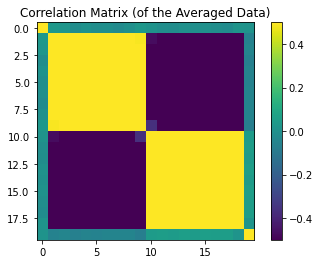

In [66]:
### create 20 matrices of the same data each with different noise
N = 1000  # time points
M = 20    # channels
K = 20   # number of matrices
 
# time vector (radian units)
t = np.linspace(0, 6 * np.pi, N)
 
# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0, 2 * np.pi, M))
 
# generate the data
data_template = np.zeros((M, N))
for mi in range(M):
    data_template[mi, :] = np.sin(t) * chanrel[mi]
 
# add different random noise scaled by a factor
data = np.zeros((K, M, N))
noise_factor = 0.7
for matrix_idx in range(K):
    data[matrix_idx, :, :] = data_template + np.random.randn(M, N) * noise_factor
# get the average of the K matrices and then compute the correlation matrix of the averages
 
# one method of averaging the matrices
data_average1 = np.zeros((M, N))
for matrix_idx in range(K):
    data_average1 += data[matrix_idx, :, :]
data_average1 /= K
# another method of averaging the matrices
data_average2 = np.mean(data, axis=0)
# compare the two
# print(sum((data_average1 - data_average2).flatten()))
 
# compute the correlation matrix
data_corr_matrix = np.corrcoef(data_average2)
# visualise it
plt.imshow(data_corr_matrix, vmin=-.5, vmax=.5)
plt.title('Correlation Matrix (of the Averaged Data)')
plt.colorbar()
plt.show()



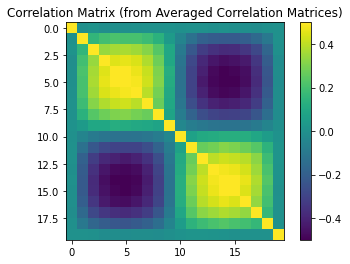

In [67]:
# compute a correlation matrix for each data simulation and then take the average of the correlation matrix
corr_matrices = np.zeros((K, M, M))
for matrix_idx in range(K):
    corr_matrices[matrix_idx, :, :] = np.corrcoef(data[matrix_idx, :, :])
 
# average of the correlation matrices
average_corr_matrix = np.mean(corr_matrices, axis=0)
# visualise it
plt.imshow(average_corr_matrix, vmin=-.5, vmax=.5)
plt.title('Correlation Matrix (from Averaged Correlation Matrices)')
plt.colorbar()
plt.show()

####correlation to covariance matrix

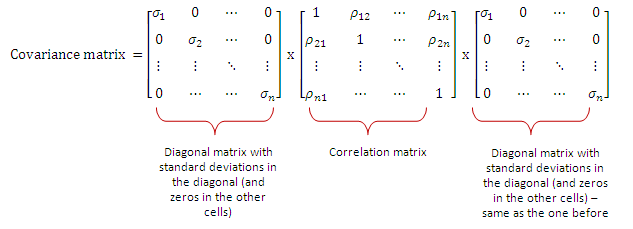

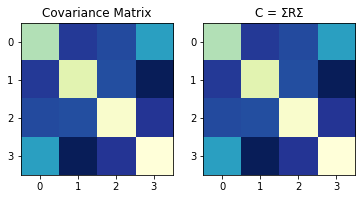

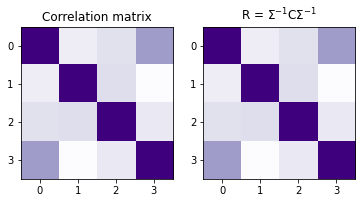

In [74]:
# create random data
M = 4
N = 50
A = np.random.randn(M,N)
 
# compute covariance and correlation directly
CorrA = np.corrcoef(A)
CovA = np.cov(A)
 
# compute stds diagonal matrix
std_matrix = np.zeros((M,M))
 
for i in range(len(A)):
    std = np.std(A[i],ddof=1)
    std_matrix[i,i] = std
 
# compute covariance from correlation
CovA_rec = std_matrix @ CorrA @ std_matrix
 
# compute correlation from covariance
std_inv = np.linalg.inv(std_matrix)#convert to inverse matrix
CorrA_rec = std_inv @ CovA @ std_inv
 
# plot covariance matrices
plt.subplot(121)
plt.imshow(CovA,cmap='YlGnBu_r')
plt.title('Covariance Matrix')
 
plt.subplot(122)
plt.imshow(CovA_rec,cmap='YlGnBu_r')
plt.title('C = $\Sigma$R$\Sigma$')
plt.show()
 
# plot correlation matrices
plt.subplot(121)
plt.imshow(CorrA,cmap='Purples')
plt.title('Correlation matrix')
 
plt.subplot(122)
plt.imshow(CorrA_rec,cmap='Purples')
plt.title('R = $\Sigma^{-1}$C$\Sigma^{-1}$')
plt.show()

### VIDEO 3: Partial correlations

one good explaination video of [Partial and semipartial correlation](https://www.youtube.com/watch?v=OpAf4N582bA)

Partial correlation, calculates the correlation between two variables to the exclusion of a third variable. This makes it possible to find out whether the correlation $r_{xy}$ between variables $x$ and $y$ is generated by the variable $z$.




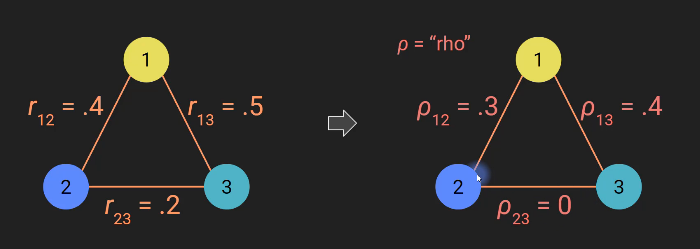

The partial correlation $r_{xy|z}$ tells how strongly the variable $x$ correlates with the variable $y$, if the correlation of both variables with the variable $z$ is partialed out.

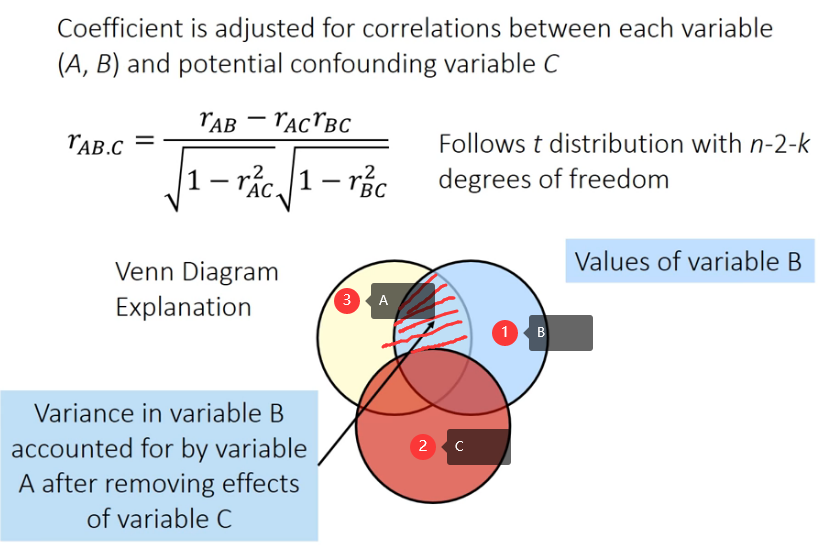

#### code:

In [8]:
# I'm using pingouin for partial correlations.
# You might need to install it, e.g., using the line below.
# This needs to be run only once per install.
# conda install -c conda-forge pingouin
!pip install pingouin
import pingouin as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 25.2 MB/s 
     |████████████████████████████████| 9.9 MB 42.8 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196208 sha256=29a24cc4cabd364f07226ca90fd5536969c9699e35c4c0ad894d4f77c048d2d0
  Stored in directory: /root/.cache/pip/wheels/75/b0/89/f6866fc5accea9bec04f4c9f2a242520d6e8e7b8fcf89e139c
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=82d96f4c1bee44293246851e017cf8e65f470e088db255eb69e9cb20b598816d
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [9]:
## the example from the video

# raw correlations
rmg = .7
rsg = .8
rms = .9

# partial correlations

rho_mg_s = (rmg - rsg*rms) / ( np.sqrt(1-rsg**2) * np.sqrt(1-rms**2) )
rho_sg_m = (rsg - rmg*rms) / ( np.sqrt(1-rmg**2) * np.sqrt(1-rms**2) )

print(rho_mg_s)
print(rho_sg_m)

-0.07647191129018778
0.5461186812727504


In [10]:
## now for datasets

N = 76

# correlated datasets
x1 = np.linspace(1,10,N) + np.random.randn(N)
x2 = x1 + np.random.randn(N)
x3 = x1 + np.random.randn(N)

# let's convert these data to a pandas frame
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3

# the fact that X two and X three are correlated with each other 
# has to do with the fact that both of these variables are 
# based on the same initial variable X one.


# compute the "raw" correlation matrix
cormatR = df.corr()
print(cormatR)

# print out one value
print(' ')
print(cormatR.values[1,0])

# partial correlation
pc = pg.partial_corr(df,x='x3',y='x2',covar='x1')
print(' ')
print(pc)

          x1        x2        x3
x1  1.000000  0.938119  0.946763
x2  0.938119  1.000000  0.882062
x3  0.946763  0.882062  1.000000
 
0.9381192437949103
 
          n         r          CI95%     p-val
pearson  76 -0.054844  [-0.28, 0.17]  0.640261


After partialing out $x_1$,this correlation has dropped precipitously.

In [11]:
pc = pg.partial_corr(df,x='x1',y='x3',covar='x2')
print(' ')
print(pc)

 
          n         r         CI95%         p-val
pearson  76  0.689555  [0.55, 0.79]  7.855349e-12


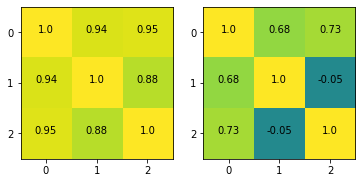

In [11]:
## visualize the matrices

fig,ax = plt.subplots(1,2,figsize=(6,3))

# raw correlations
ax[0].imshow(cormatR.values,vmin=-0.1,vmax=1)
ax[0].set_xticks(range(3))
ax[0].set_yticks(range(3))

# add text 
for i in range(3):
    for j in range(3):
        ax[0].text(i,j,np.round(cormatR.values[i,j],2), horizontalalignment='center')

        
        
# partial correlations
partialCorMat = df.pcorr()
ax[1].imshow(partialCorMat.values,vmin=-1,vmax=1)
ax[1].set_xticks(range(3))
ax[1].set_yticks(range(3))

for i in range(3):
    for j in range(3):
        ax[1].text(i,j,np.round(partialCorMat.values[i,j],2), horizontalalignment='center')


plt.show()

###vedio 4:Spearman correlation and Fisher-Z

#### Spearman correlation 

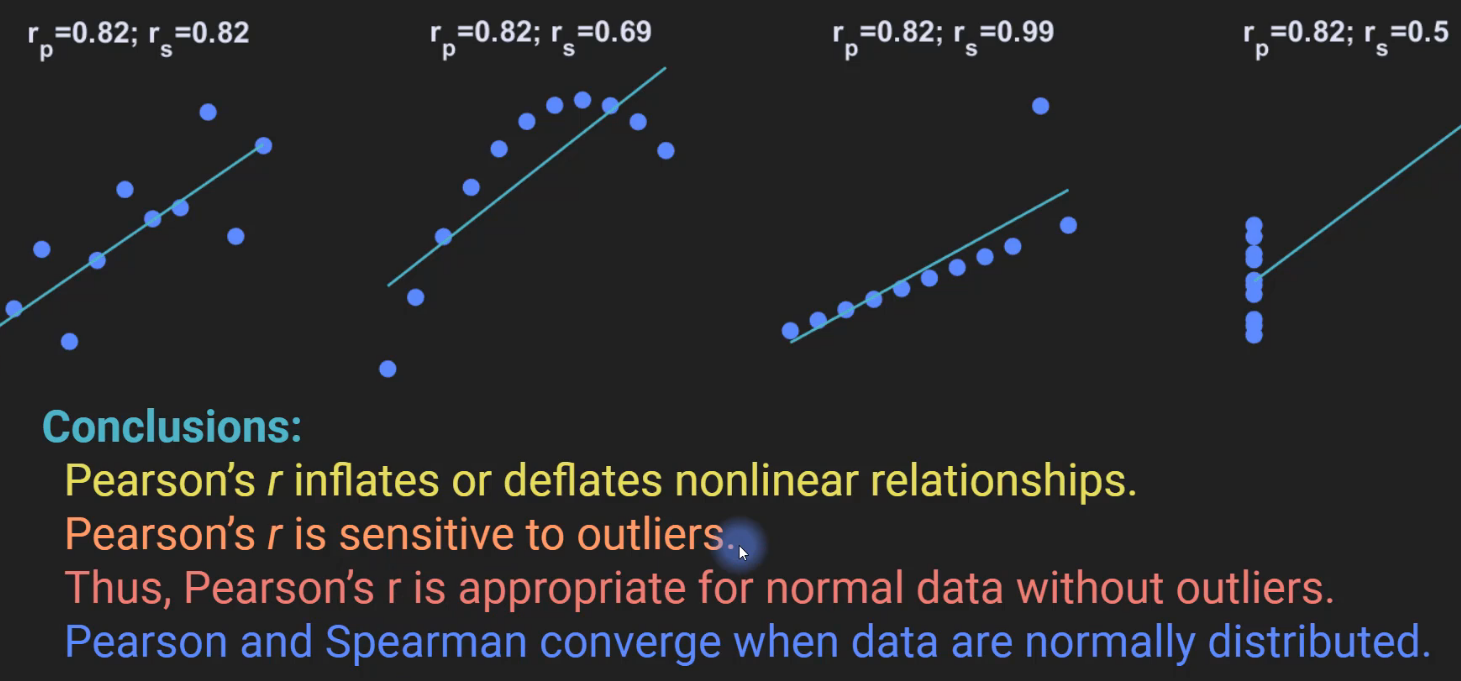

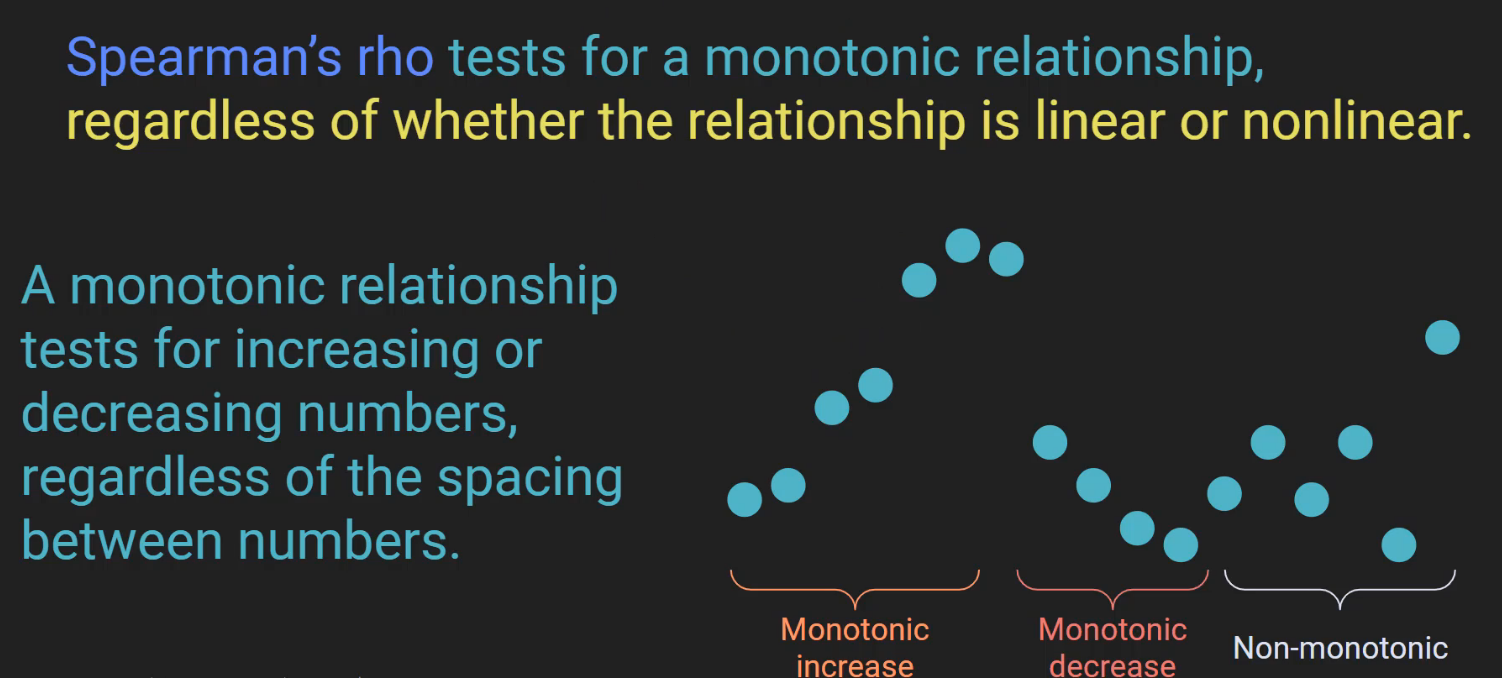

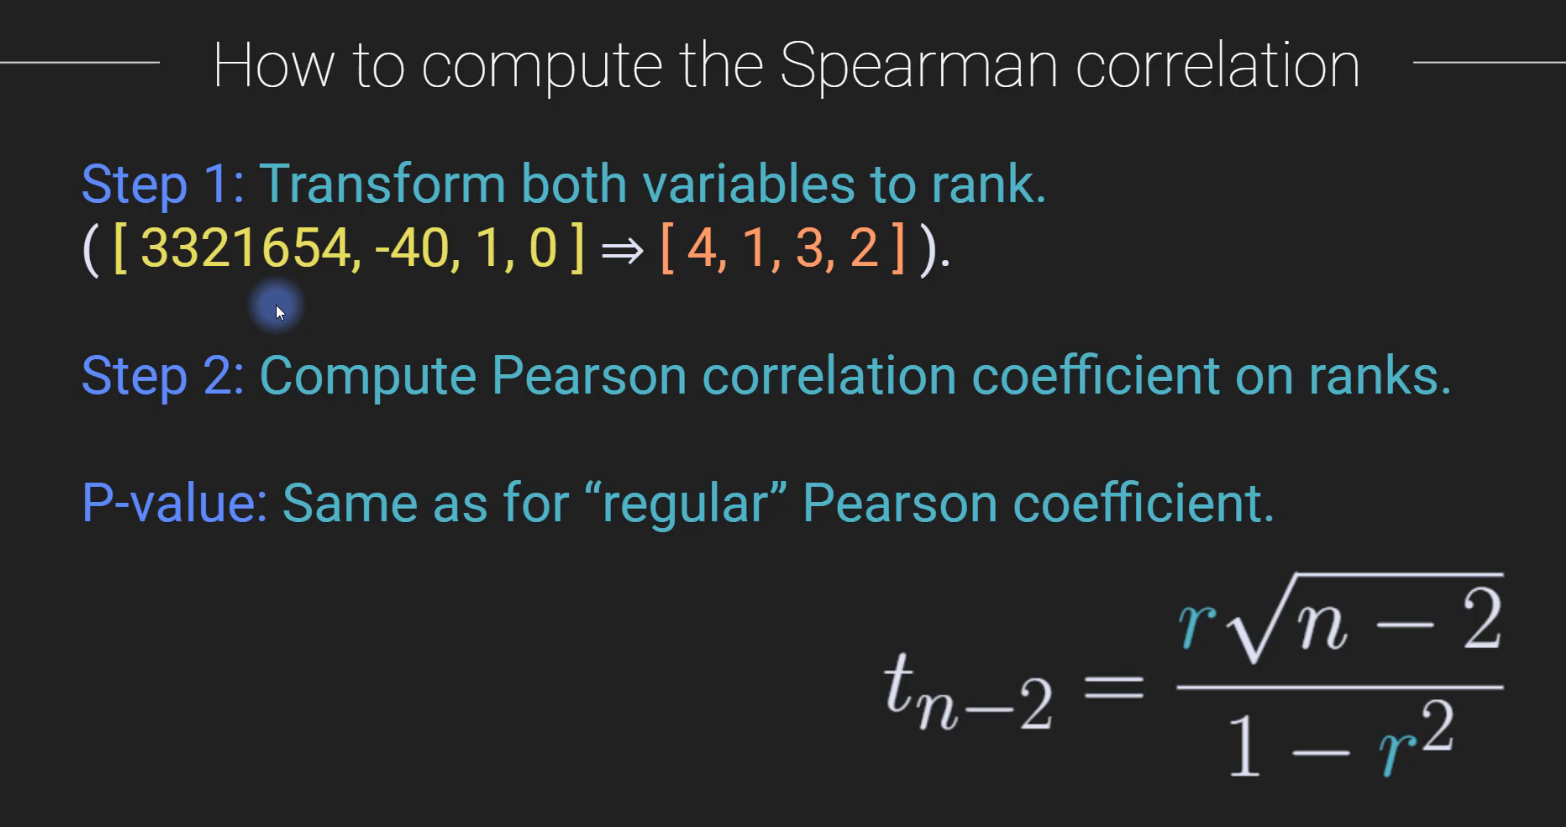

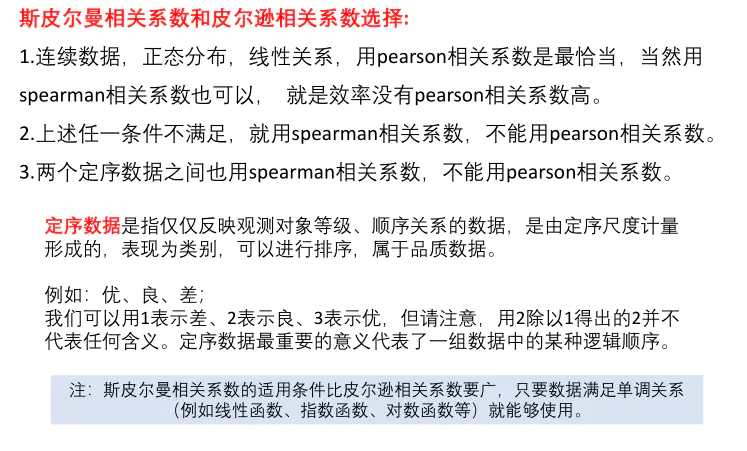

In [ ]:
## Anscobe's quartet

anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])


# plot and compute correlations
fig,ax = plt.subplots(2,2,figsize=(6,6))
ax = ax.ravel()

for i in range(4):
    ax[i].plot(anscombe[:,i*2],anscombe[:,i*2+1],'ko')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    corr_p = stats.pearsonr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
    corr_s = stats.spearmanr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
    ax[i].set_title('r_p = %g, r_s = %g'%(np.round(corr_p*100)/100,np.round(corr_s*100)/100))

plt.show()

#### Fisher-Z

many correlation distribution is **not normal distribution**, we need a tool to **convert them into a normal distribution** so that we can do further analysis.[The distribution of the sample correlation](https://blogs.sas.com/content/iml/2017/09/20/fishers-transformation-correlation.html)



> **the sampling distribution for highly correlated variables is highly skewed.**



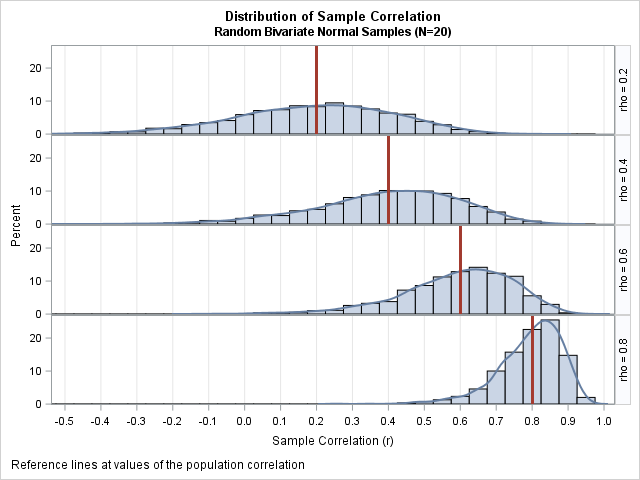

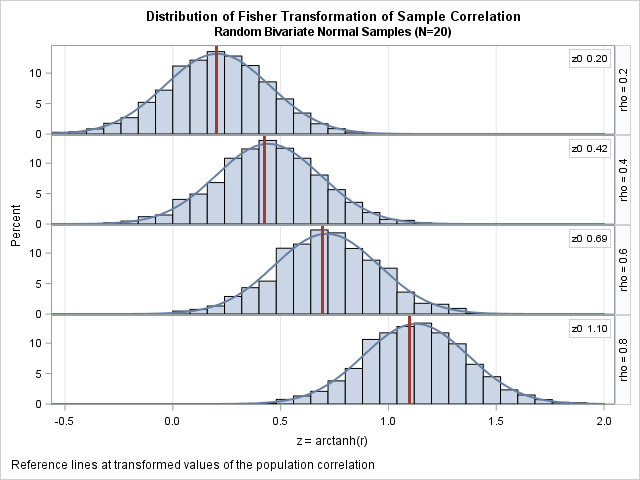

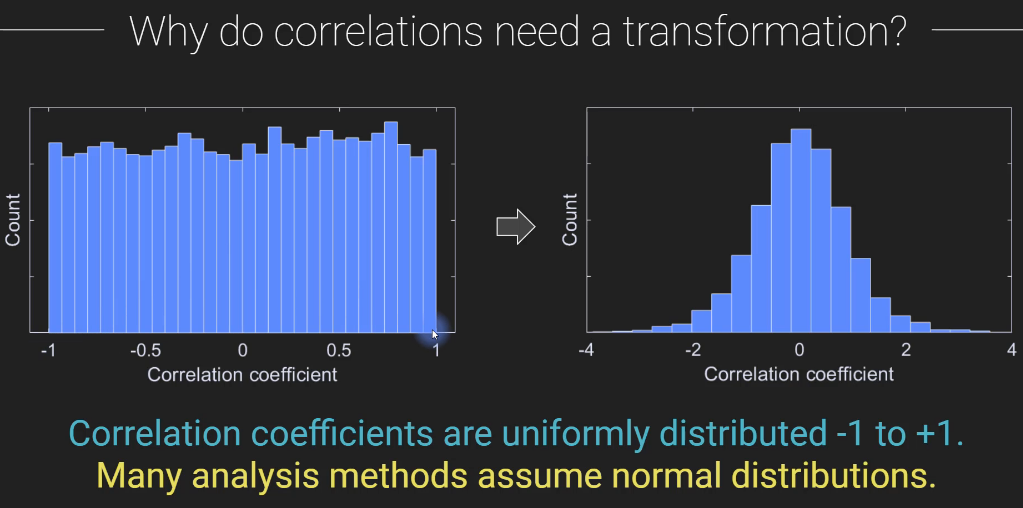

Here is the formular of fisher-z:

\begin{align}
z_{r} = \frac{1}{2} \ln (\frac{1+r}{1-r}) = \text arctanh(r)
\end{align}



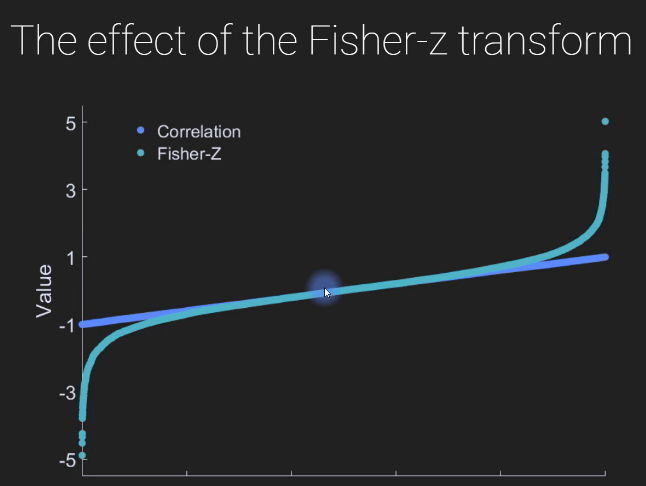

again, if you are competing correlations

just for the correlation to determine the relationship between two variables, you probably don't need to worry about the fissures that transform the fissure.

Transform is usually important for when you are computing lots of correlations across maybe lots of different individuals and you are pulling those correlations together to **do some kind of subsequent analysis that makes assumptions about normal distributions** like the` T-test `or` ANOVA `and so on.

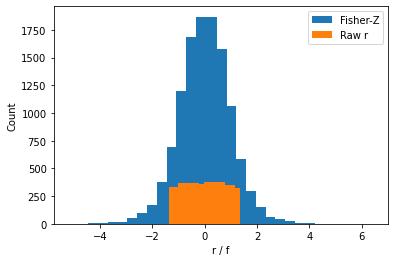

In [3]:
## Fisher-Z transform


# simulate correlation coefficients
N = 10000
r = 2*np.random.rand(N) - 1

# Fisher-Z
fz = np.arctanh(r)
# because we have already have the r,
# we can directly use arctanh to tranform to fisher-z


# overlay the Fisher-Z
y,x = np.histogram(fz,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y)

# raw correlations
y,x = np.histogram(r,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y)


plt.xlabel('r / f')
plt.ylabel('Count')
plt.legend(('Fisher-Z','Raw r'))

plt.show()

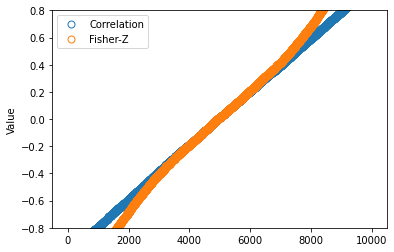

In [4]:
plt.plot(range(N),np.sort(r), 'o',markerfacecolor='w',markersize=7)
plt.plot(range(N),np.sort(fz),'o',markerfacecolor='w',markersize=7)
plt.ylabel('Value')
plt.legend(('Correlation','Fisher-Z'))

# zoom in
plt.ylim([-.8,.8])
plt.show()

#### "Unsupervised learning": confidence interval on correlation via boostraping